In [1]:
#라이브러리 로드

# loader library 
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf


야후 라이브러리 설치

In [2]:
# ! pip install yfinance

삼성전자 주식 정보 가지고 오기
미국 주식은 다른 라이브러리를 사용해야해.

In [3]:
ticker="005930.KS"
data=yf.download(ticker, start='2010-01-01', end='2025-12-31',
                 interval='1d', auto_adjust=False) #1d 는 하루, auto_adjust=False 수정종가를 추가
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,,
2010-01-04,11925.159180,16180.0,16180.0,16000.0,16060.0,11950800
2010-01-05,12116.784180,16440.0,16580.0,16300.0,16520.0,27925850
2010-01-06,12396.859375,16820.0,16820.0,16520.0,16580.0,22948850
2010-01-07,11984.117188,16260.0,16820.0,16260.0,16820.0,22107950
2010-01-08,12102.043945,16420.0,16420.0,16120.0,16400.0,14777550
...,...,...,...,...,...,...
2025-12-23,111500.000000,111500.0,112500.0,110400.0,110900.0,20419187
2025-12-24,111100.000000,111100.0,112400.0,110900.0,112400.0,12492939


데이터 탐색
Volume, 005930.KS 은 거래량.

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3935 entries, 2010-01-04 to 2025-12-30
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, 005930.KS)  3935 non-null   float64
 1   (Close, 005930.KS)      3935 non-null   float64
 2   (High, 005930.KS)       3935 non-null   float64
 3   (Low, 005930.KS)        3935 non-null   float64
 4   (Open, 005930.KS)       3935 non-null   float64
 5   (Volume, 005930.KS)     3935 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 215.2 KB


컬럼이름

In [5]:
data.Close

Ticker,005930.KS
Date,
2010-01-04,16180.0
2010-01-05,16440.0
2010-01-06,16820.0
2010-01-07,16260.0
2010-01-08,16420.0
...,...
2025-12-23,111500.0
2025-12-24,111100.0
2025-12-26,117000.0


In [6]:
data.reset_index(inplace=True)

In [7]:
# data.to_csv('../data00/005930.KS.csv', index=False)

In [8]:
data1=pd.read_csv('../data00/005930.KS.csv')
data1

,Date,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,11925.15918,16180,16180,16000,16060,11950800
1,2010-01-05,12116.78711,16440,16580,16300,16520,27925850
2,2010-01-06,12396.85742,16820,16820,16520,16580,22948850
3,2010-01-07,11984.12012,16260,16820,16260,16820,22107950
4,2010-01-08,12102.04785,16420,16420,16120,16400,14777550
...,...,...,...,...,...,...,...
3930,2025-12-23,111500.00000,111500,112500,110400,110900,20419187
3931,2025-12-24,111100.00000,111100,112400,110900,112400,12492939
3932,2025-12-26,117000.00000,117000,117000,112400,112400,34018174
3933,2025-12-29,119500.00000,119500,119700,118200,119400,19676004


날짜가 작으면 연단위로 눈금이 찍히게.

일단 데이터를 날짜로 만들자.
type


날짜를 datatime으로 바꾸자.

In [9]:
data1['Date']=pd.to_datetime(data1['Date'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3935 entries, 0 to 3934
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3935 non-null   datetime64[ns]
 1   Adj Close  3935 non-null   float64       
 2   Close      3935 non-null   int64         
 3   High       3935 non-null   int64         
 4   Low        3935 non-null   int64         
 5   Open       3935 non-null   int64         
 6   Volume     3935 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 215.3 KB


데이트를 인덱스로 바꾸자.

In [10]:
data1.set_index('Date', inplace=True)

data1

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,11925.15918,16180,16180,16000,16060,11950800
2010-01-05,12116.78711,16440,16580,16300,16520,27925850
2010-01-06,12396.85742,16820,16820,16520,16580,22948850
2010-01-07,11984.12012,16260,16820,16260,16820,22107950
2010-01-08,12102.04785,16420,16420,16120,16400,14777550
...,...,...,...,...,...,...
2025-12-23,111500.00000,111500,112500,110400,110900,20419187
2025-12-24,111100.00000,111100,112400,110900,112400,12492939
2025-12-26,117000.00000,117000,117000,112400,112400,34018174


거래량이 없는게 보기. 거래량은 없고 가격만 있는 것.
제거해줘야해.

0 아닌거 뽑는 방법!

In [11]:
data2=data1.loc[data1['Volume']!=0]

In [12]:
data2.loc[data2['Volume']==0]

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,


거래량 0인거 제거함

null 값으로 제거하는 방법

In [13]:
data3=data1 #복사

data3['Volume'] = data3['Volume'].replace(0, np.nan)

data3.isnull().sum()

Adj Close     0
Close         0
High          0
Low           0
Open          0
Volume       18
dtype: int64

In [14]:
data3 = data3.dropna()
data3.isnull().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

차트를 그려보자

파이토치랑 맵플롭비 충돌방지 넣고

In [15]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

삼성주식 주가

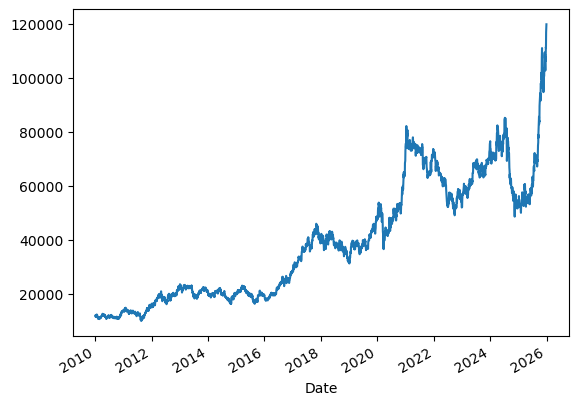

In [16]:
pig=data2['Adj Close'].plot()

수정종가를 정답으로 하고, x값을 수정종값 빼는 것으로-

수정종가를 뺀 X를 만들어써. Y는 수정종가만

In [17]:
X=data2.drop('Adj Close', axis=1)
X

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,16180,16180,16000,16060,11950800
2010-01-05,16440,16580,16300,16520,27925850
2010-01-06,16820,16820,16520,16580,22948850
2010-01-07,16260,16820,16260,16820,22107950
2010-01-08,16420,16420,16120,16400,14777550
...,...,...,...,...,...
2025-12-23,111500,112500,110400,110900,20419187
2025-12-24,111100,112400,110900,112400,12492939
2025-12-26,117000,117000,112400,112400,34018174


In [18]:
Y=data2[['Adj Close']]
Y

,Adj Close
Date,
2010-01-04,11925.15918
2010-01-05,12116.78711
2010-01-06,12396.85742
2010-01-07,11984.12012
2010-01-08,12102.04785
...,...
2025-12-23,111500.00000
2025-12-24,111100.00000
2025-12-26,117000.00000


y는 시리즈, x는 데이터프레임 상태
하나만 있는 상태인데..시리즈임 어쨌든 ㅇㅁㅇ?

In [19]:
print(X.shape, type(X))
print(Y.shape, type(Y))

(3917, 5) <class 'pandas.core.frame.DataFrame'>
(3917, 1) <class 'pandas.core.frame.DataFrame'>


X를 보면 값 차이가 많이 나. 계산하다보면 볼륨 영향이 제일 클거야.
우리는 같은 값으로 만들어야한다.

머신러닝, 딥러닝 돌릴때 필드마다 값의 차이가 너무 크면 0.0001인 것과 차이가 커

Volume 10이나 close 0.1 이나 차이가 다른데 같이 치급
값의 단위를 맞춰줘야해.

3525가 X데이터 나눠지는 기준

In [20]:
#트러블 슈팅중
X.iloc[3525]

Close        78400
High         79000
Low          78200
Open         78500
Volume    13690583
Name: 2024-05-21 00:00:00, dtype: int64

In [21]:
X

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,16180,16180,16000,16060,11950800
2010-01-05,16440,16580,16300,16520,27925850
2010-01-06,16820,16820,16520,16580,22948850
2010-01-07,16260,16820,16260,16820,22107950
2010-01-08,16420,16420,16120,16400,14777550
...,...,...,...,...,...
2025-12-23,111500,112500,110400,110900,20419187
2025-12-24,111100,112400,110900,112400,12492939
2025-12-26,117000,117000,112400,112400,34018174


사이키런에 스케일 조정

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ms=MinMaxScaler() #0~1
ss=StandardScaler() #평균 0, 표준편차 1

#순서가 중요하니까 섞으면 안돼.

In [23]:
train_cnt=int(X.shape[0]*0.9) #[0] 한게 갯수때문이라구?
test_cnt=int(X.shape[0]*0.1)
print(train_cnt, test_cnt, len(X))

3525 391 3917


In [24]:
X_ss=ss.fit_transform(X) #스텐다드스케일
Y_ms=ms.fit_transform(Y) #최대값이 1, 최소0

print(X_ss)
print(Y_ms)

[[-1.31687681 -1.32407682 -1.31738162 -1.32208688 -0.45135789]
 [-1.30488294 -1.30581174 -1.30341525 -1.30088474  1.63724441]
 [-1.28735344 -1.2948527  -1.29317325 -1.29811924  0.98654387]
 ...
 [ 3.33397697  3.27963552  3.17047921  3.11837862  2.4337641 ]
 [ 3.44930264  3.40292478  3.44049574  3.44101988  0.55864701]
 [ 3.46775475  3.47141882  3.46377302  3.4271924   0.56784403]]
[[0.01620024]
 [0.01794623]
 [0.02049806]
 ...
 [0.973577  ]
 [0.99635545]
 [1.        ]]


In [25]:
x_train= X_ss[:train_cnt]
x_test= X_ss[train_cnt:]

y_train=Y_ms[:train_cnt]
y_test=Y_ms[train_cnt:]

In [26]:
print(x_train.shape, y_train.shape) #어레이라서 shape로 봐야한데
print(x_test.shape, y_test.shape)

(3525, 5) (3525, 1)
(392, 5) (392, 1)


In [27]:
#트러블 슈팅중
x_train

array([[-1.31687681, -1.32407682, -1.31738162, -1.32208688, -0.45135789],
       [-1.30488294, -1.30581174, -1.30341525, -1.30088474,  1.63724441],
       [-1.28735344, -1.2948527 , -1.29317325, -1.29811924,  0.98654387],
       ...,
       [ 1.54412251,  1.60381482,  1.57365736,  1.63422885,  0.73041182],
       [ 1.50721829,  1.53532079,  1.53175824,  1.56048228,  0.06734614],
       [ 1.5764137 ,  1.5490196 ,  1.56434644,  1.53743647,  0.52998573]])

작업하려면 토치로 만들어야해!!

위의 2차원 x를 3차원으로 만들어

In [28]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [29]:
x_train_tensors = torch.Tensor(x_train)
x_test_tensors = torch.Tensor(x_test)
y_train_tensors = torch.Tensor(y_train)
y_test_tensors = torch.Tensor(y_test)

#x 데이터를 tensor shape 변경 2차원(row, columns) -> 3차원(row, 1, columns) 1을 넣어서 차원 추가
x_train_tensors_f = x_train_tensors.view(x_train_tensors.size(0),1, x_train_tensors.size(1))
x_test_tensors_f = x_test_tensors.view(x_test_tensors.size(0),1, x_test_tensors.size(1))

print(x_train_tensors_f.size(), y_train_tensors.size())
print(x_test_tensors_f.size(), y_test_tensors.size())

torch.Size([3525, 1, 5]) torch.Size([3525, 1])
torch.Size([392, 1, 5]) torch.Size([392, 1])


클래스를 만들어보자

In [30]:
class LSTM(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
    super(LSTM, self).__init__()
    self.num_classes=num_classes
    self.input_size=input_size
    self.hidden_size=hidden_size
    self.num_layers=num_layers
    self.seq_length=seq_length
    self.lstm=nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers,
                       batch_first=True)
    
    self.fc1=nn.Linear(hidden_size, 128)
    self.fc2=nn.Linear(128, num_classes)
    self.relu=nn.ReLU()

  def forward(self, x):
    h_0=torch.zeros(self.num_layers, x.size(0), self.hidden_size) #초기 은닉층
    c_0=torch.zeros(self.num_layers, x.size(0), self.hidden_size) #초기 셀상태

    output,(hn, cn)=self.lstm(x, (h_0, c_0))
    hn=hn.view(-1, self.hidden_size) #마지막 은닉 상태를 완전 연결층으로 펼침

    out=self.relu(hn) # 은닉층 값을 가지고 온다
    out=self.fc1(out)
    out=self.relu(out)
    out=self.fc2(out)
    return out




모델이 정상인가 확인

In [31]:
#파라미터 넣기

epochs = 5000
learning_rate=0.0001
input_size=5 #입력데이터 개수
hidden_size=2 #은닉층 유닛 개수
num_layers=1 #LSTM 레이어의 개수 1
num_classes =1 #출력 클래스의 개수 1


In [32]:
model = LSTM(num_classes, input_size, hidden_size, num_layers, x_train_tensors_f.shape[1])
crit = nn.MSELoss()

#종가를 예측하는 연속된 값

optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [40]:
for epoch in range(epochs):
  outputs=model(x_train_tensors_f)
  optimizer.zero_grad()
  loss=crit(outputs, y_train_tensors)
  loss.backward()
  optimizer.step()

  if epoch % 100 ==0:
    print(f'epoch:{epoch}/{epoch}, loss:{loss.item():.4f}')


epoch:0/0, loss:0.0002
epoch:100/100, loss:0.0002
epoch:200/200, loss:0.0002
epoch:300/300, loss:0.0002
epoch:400/400, loss:0.0002
epoch:500/500, loss:0.0002
epoch:600/600, loss:0.0002
epoch:700/700, loss:0.0002
epoch:800/800, loss:0.0001
epoch:900/900, loss:0.0001
epoch:1000/1000, loss:0.0001
epoch:1100/1100, loss:0.0001
epoch:1200/1200, loss:0.0001
epoch:1300/1300, loss:0.0001
epoch:1400/1400, loss:0.0001
epoch:1500/1500, loss:0.0001
epoch:1600/1600, loss:0.0001
epoch:1700/1700, loss:0.0001
epoch:1800/1800, loss:0.0001
epoch:1900/1900, loss:0.0001
epoch:2000/2000, loss:0.0001
epoch:2100/2100, loss:0.0001
epoch:2200/2200, loss:0.0001
epoch:2300/2300, loss:0.0001
epoch:2400/2400, loss:0.0001
epoch:2500/2500, loss:0.0001
epoch:2600/2600, loss:0.0001
epoch:2700/2700, loss:0.0001
epoch:2800/2800, loss:0.0001
epoch:2900/2900, loss:0.0001
epoch:3000/3000, loss:0.0001
epoch:3100/3100, loss:0.0001
epoch:3200/3200, loss:0.0001
epoch:3300/3300, loss:0.0001
epoch:3400/3400, loss:0.0001
epoch:350

손실함수까지 구함.
테스트 데이터가 이 값과 유사하게 나오는지 보자!

In [41]:
data_x_ss=ss.transform(X)
data_y_ms=ms.transform(Y)

data_x_ss=Variable(torch.Tensor(data_x_ss)) 
#훈련시킬때 트레이닝 잘라서 했어. 하지만 지금은 전체 넣었어. 트레이닝은 같게, 테스트는 약간 다르게
data_y_ms=Variable(torch.Tensor(data_y_ms))

data_x_ss1=data_x_ss.view(data_x_ss.size(0), 1, data_x_ss.size(1)) #2차원이 1인 3차원 만들?

print(data_x_ss1.size(), data_y_ms.size())

torch.Size([3917, 1, 5]) torch.Size([3917, 1])


In [42]:
import datetime
predict = model(data_x_ss1)
predict

tensor([[0.0201],
        [0.0180],
        [0.0206],
        ...,
        [0.7117],
        [0.7103],
        [0.7123]], grad_fn=<AddmmBackward0>)

값을 스케일해서 작은 값으로 보여주는거임.
넘파이 배열로 바꿔보자. 우리가 넘파이배열로 스케일을 줄였기 때문에!

In [43]:
predicted=predict.data.numpy()
print(predicted)

[[0.02007796]
 [0.01801625]
 [0.0205638 ]
 ...
 [0.7116897 ]
 [0.7102608 ]
 [0.7122656 ]]


원래값과 비슷하게 됨. ms.inverse_transform 원래의 y값과 비교가 가능

In [44]:
r_predicted=ms.inverse_transform(predicted)
labels_y=ms.inverse_transform(data_y_ms.data.numpy())
print(r_predicted)
print(labels_y)

[[12350.751]
 [12124.472]
 [12404.072]
 ...
 [88257.125]
 [88100.3  ]
 [88320.33 ]]
[[ 11925.159]
 [ 12116.787]
 [ 12396.857]
 ...
 [117000.01 ]
 [119500.   ]
 [119900.   ]]


In [45]:
data2['predicted']=r_predicted
data2['Adj Close']=labels_y

data2

C:\Users\it\AppData\Local\Temp\ipykernel_15884\1640969408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['predicted']=r_predicted
C:\Users\it\AppData\Local\Temp\ipykernel_15884\1640969408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Adj Close']=labels_y


,Adj Close,Close,High,Low,Open,Volume,predicted
Date,,,,,,,
2010-01-04,11925.159180,16180,16180,16000,16060,11950800,12350.750977
2010-01-05,12116.787109,16440,16580,16300,16520,27925850,12124.471680
2010-01-06,12396.857422,16820,16820,16520,16580,22948850,12404.072266
2010-01-07,11984.120117,16260,16820,16260,16820,22107950,12232.295898
2010-01-08,12102.047852,16420,16420,16120,16400,14777550,12331.393555
...,...,...,...,...,...,...,...
2025-12-23,111500.000000,111500,112500,110400,110900,20419187,86623.648438
2025-12-24,111100.000000,111100,112400,110900,112400,12492939,86228.781250
2025-12-26,117000.007812,117000,117000,112400,112400,34018174,88257.125000


값이 튄다. 그래프를 그려보자

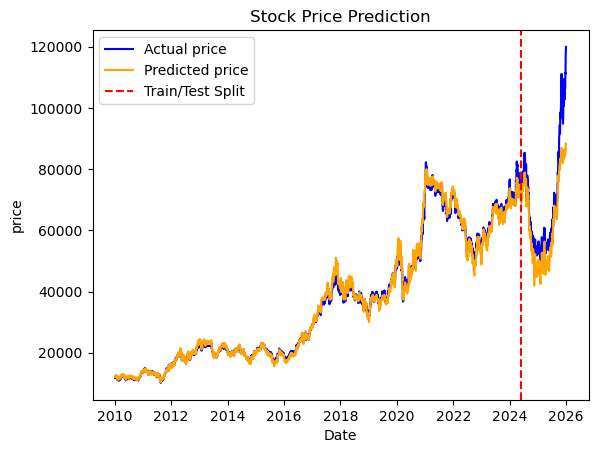

In [46]:
plt.Figure(figsize=(15, 5))
plt.plot(data2.index, data2['Adj Close'], label='Actual price', color='blue')
plt.plot(data2.index, data2['predicted'], label='Predicted price', color='orange')
plt.title("Stock Price Prediction")

#앞은 훈련, 뒤는 미훈련 기준선
plt.axvline(x=datetime.datetime(2024,5,21), color='red', linestyle='--', label='Train/Test Split') 
plt.legend()
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

데이터 구성을 다시해도 된다.

예를 들어서 

x
1
2
3                  y 결과 얻고   
4                  y 결과 얻고

아니면 
1
2
3
3일데이터가지고 4일째 예측

주식 단타예측은 곧 잘해.


LSTM의 장기저장소를 통해서 조금더 뒤까지 영향을 줄수있어.

GRU

In [ ]:
class GRU(nn.Module) :
  def __init__(self, input_dim, hidden_dim, seq_len, output_dim, layers):
    super(GRU, self).__init__()
    self.num_classes = output_dim
    self.num_layers = layers
    self.input_size = input_dim
    self.hidden_size = hidden_dim
    self.seq_length = seq_len

    # LSTM과 이게 달라 
    self.gru = nn.GRU(input_size=input_dim,hidden_size=hidden_dim,

    num_layers=layers,batch_first=True)
    self.fc_1 = nn.Linear(hidden_dim, 128)
    self.fc = nn.Linear(128, output_dim)
    self.relu = nn.ReLU()

  def forward(self, x) :
    #간소화 됐으니 이부분도 달라. C0 삭제,
    h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
    output, (hn) = self.gru(x, (h_0))
    hn = hn.view(-1, self.hidden_size)
    out = self.relu(hn)
    out = self.fc_1(out)
    out = self.relu(out)
    out = self.fc(out)
    return out